In [1]:
from template_files import wholesale_customers

df = wholesale_customers.read_csv_2('data/wholesale_customers.csv')
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [2]:
df_statistics = wholesale_customers.summary_statistics(df)
df_statistics

,mean,std,min,max
Fresh,12000,12647,3,112151
Milk,5796,7380,55,73498
Grocery,7951,9503,3,92780
Frozen,3072,4855,25,60869
Detergents_Paper,2881,4768,3,40827
Delicassen,1525,2820,3,47943


In [3]:
df_standardized = wholesale_customers.standardize(df)
df_standardized.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,440.000000
mean,-3.027881e-17,0.000000,-4.844610e-17,2.826022e-17,1.614870e-17,0.000000
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-9.486033e-01,-0.777910,-8.363823e-01,-6.276286e-01,-6.037292e-01,-0.539650
25%,-7.015353e-01,-0.577649,-6.101418e-01,-4.798844e-01,-5.505082e-01,-0.395950
50%,-2.764455e-01,-0.293923,-3.362856e-01,-3.184420e-01,-4.331074e-01,-0.198351
75%,3.900786e-01,0.188877,2.845866e-01,9.935132e-02,2.182338e-01,0.104741
max,7.918724e+00,9.173208,8.926367e+00,1.190545e+01,7.958613e+00,16.459711


In [4]:
df_standardized_statistics = wholesale_customers.summary_statistics(df_standardized)
df_standardized_statistics

,mean,std,min,max
Fresh,0,1,-0.948603,7.918724
Milk,0,1,-0.777910,9.173208
Grocery,0,1,-0.836382,8.926367
Frozen,0,1,-0.627629,11.905449
Detergents_Paper,0,1,-0.603729,7.958613
Delicassen,0,1,-0.539650,16.459711


In [5]:
km = wholesale_customers.kmeans(df_standardized, 3)
km

0      1
1      1
2      1
3      1
4      0
      ..
435    0
436    0
437    2
438    1
439    1
Length: 440, dtype: int32

In [6]:
kpp = wholesale_customers.kmeans_plus(df_standardized, 3)
kpp

0      2
1      2
2      2
3      2
4      0
      ..
435    0
436    0
437    1
438    2
439    2
Length: 440, dtype: int32

In [7]:
agg = wholesale_customers.agglomerative(df, 3)
agg

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    0
438    0
439    0
Length: 440, dtype: int64

In [8]:
km_result = wholesale_customers.clustering_score(df, km)
kmpp_result = wholesale_customers.clustering_score(df, kpp)
agg_result = wholesale_customers.clustering_score(df, agg)
print(f'K-means result {km_result}')
print(f'K-means++ result {kmpp_result}')
print(f'Agglomerative result {agg_result}')

K-means result 0.42872760695684464
K-means++ result 0.42872760695684464
Agglomerative result 0.7261527582362313


In [9]:
cluster_results = wholesale_customers.cluster_evaluation(df)
cluster_results

,Algorithm,data,k,Silhouette Score
0,Kmeans,Original,3,0.463027
1,Kmeans,Original,3,0.475039
2,Kmeans,Original,3,0.476409
3,Kmeans,Original,3,0.476409
4,Kmeans,Original,3,0.456342
...,...,...,...,...
61,Kmeans,Standardized,10,0.248974
62,Kmeans,Standardized,10,0.256459
63,Agglomerative,Standardized,3,0.796648
64,Agglomerative,Standardized,5,0.734538


In [10]:
wholesale_customers.best_clustering_score(cluster_results)

0.7966481845391108

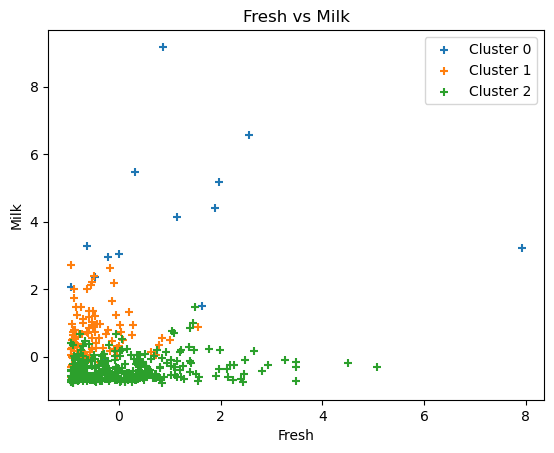

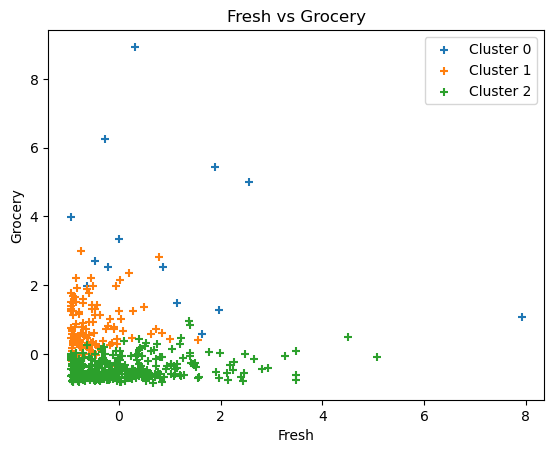

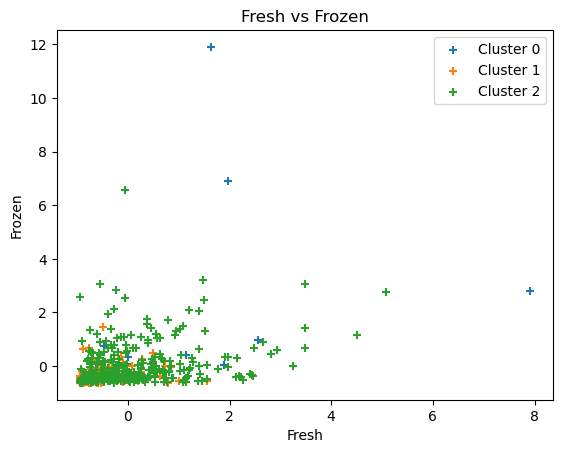

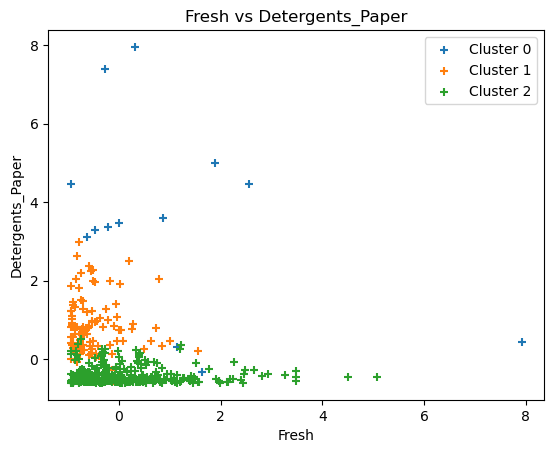

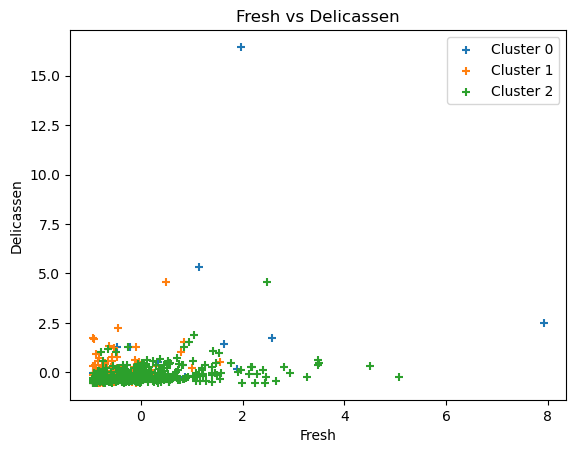

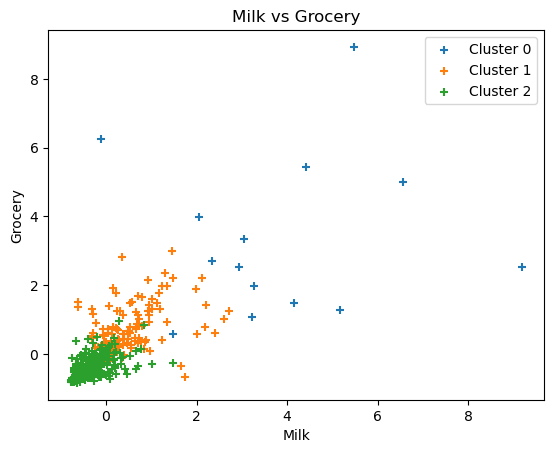

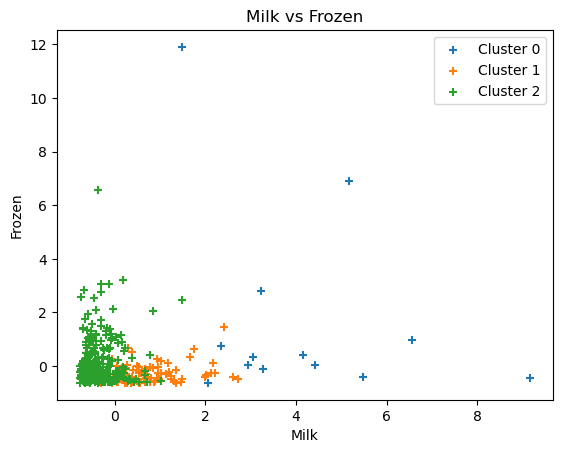

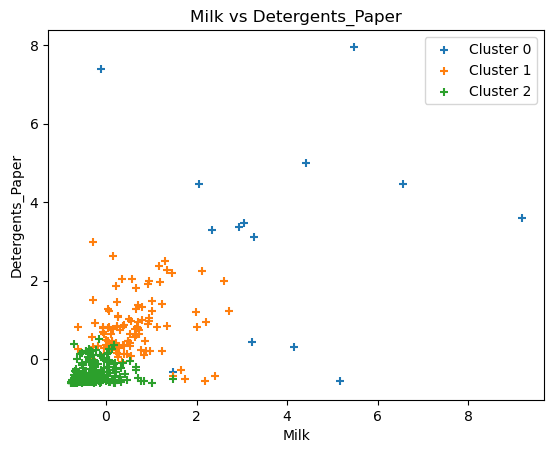

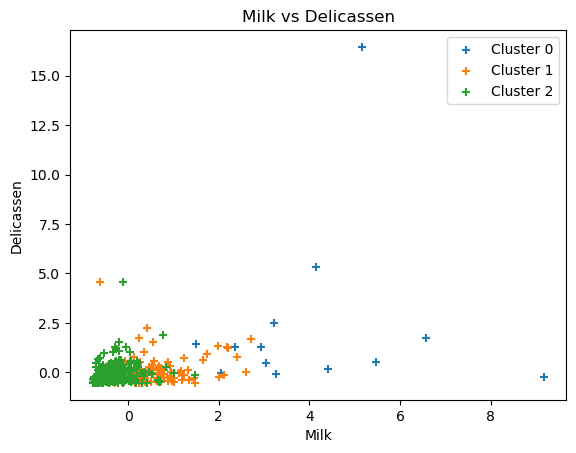

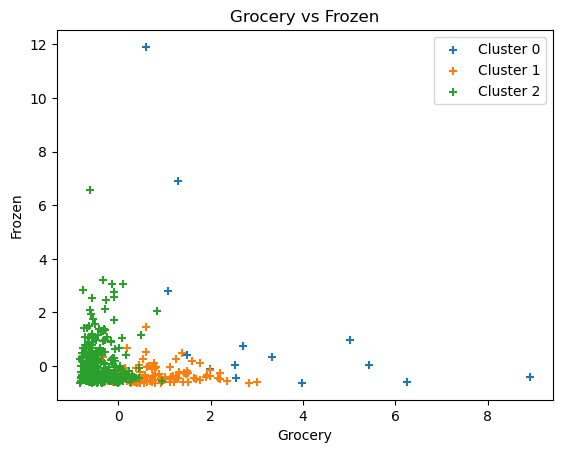

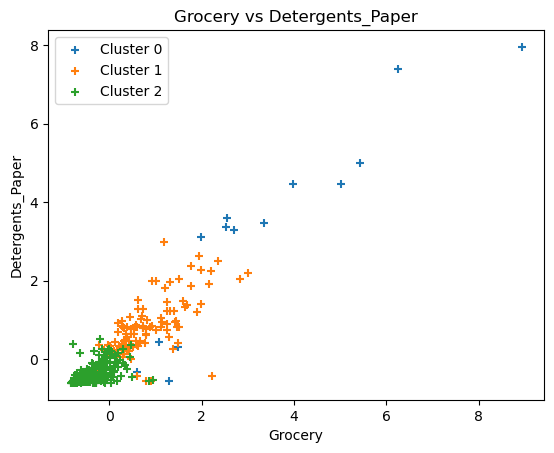

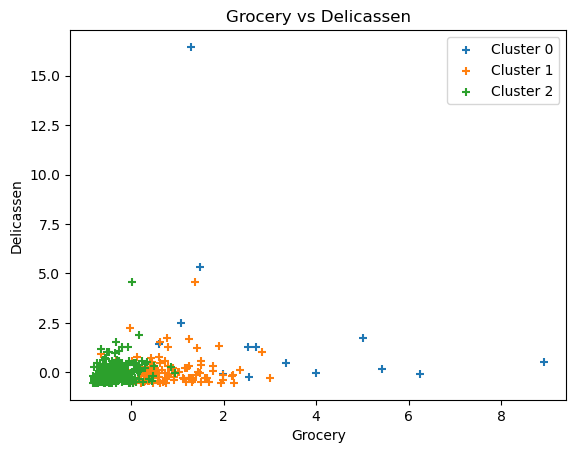

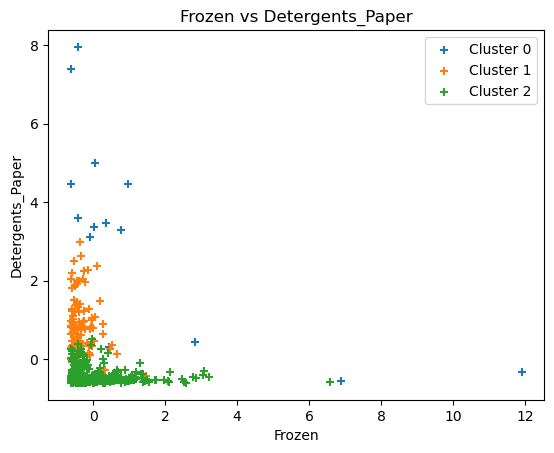

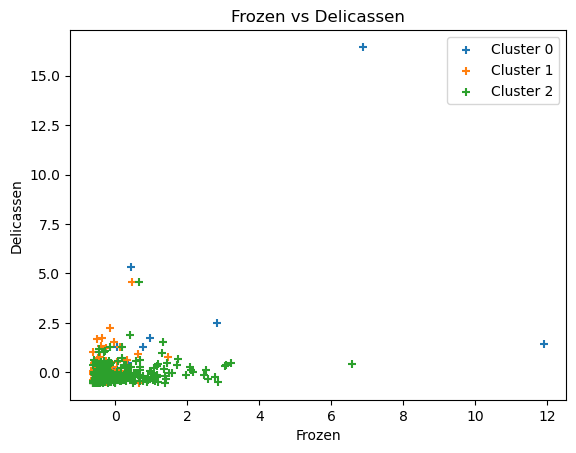

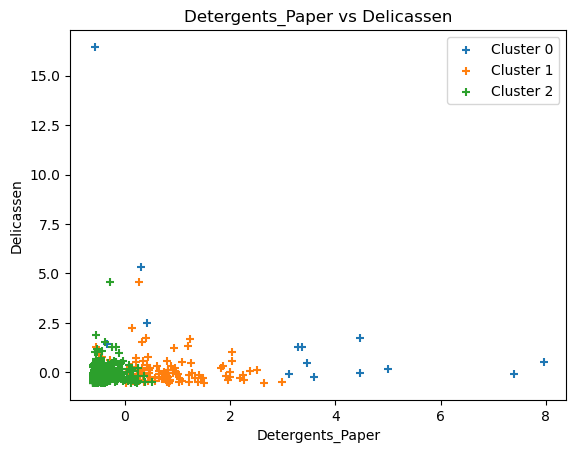

In [11]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
wholesale_customers.scatter_plots(df)

c:\Users\santiago.calderon\AppData\Local\miniconda3\envs\dm1_2024\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


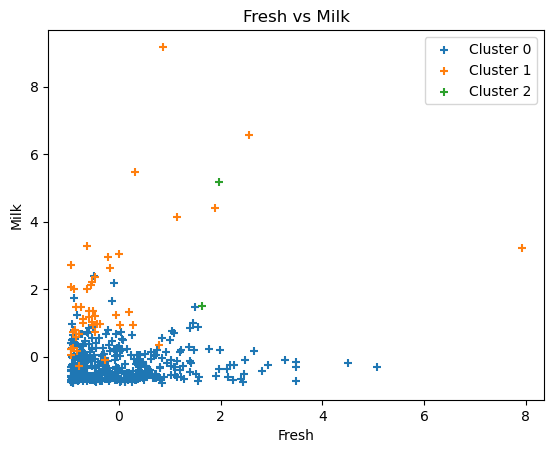

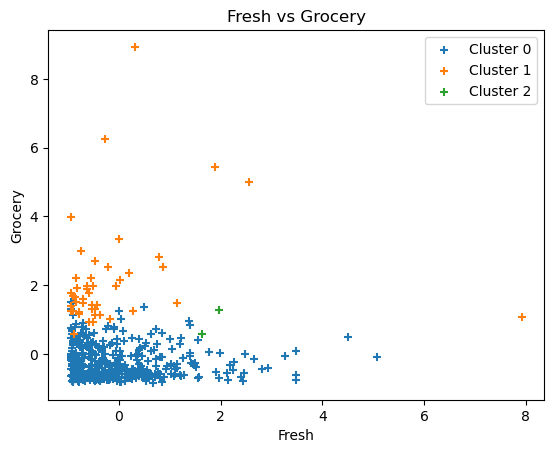

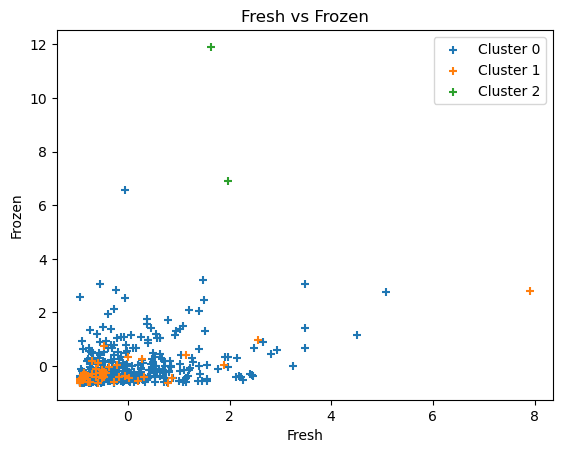

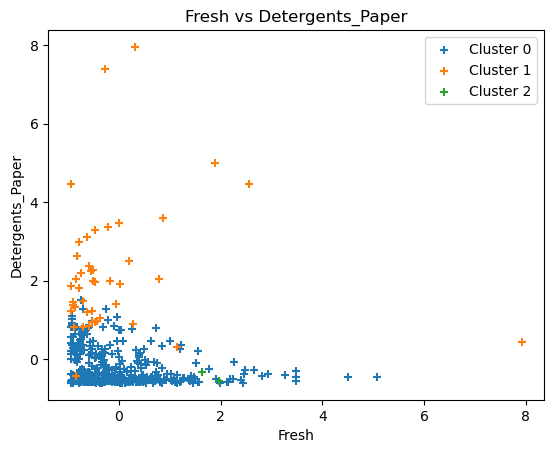

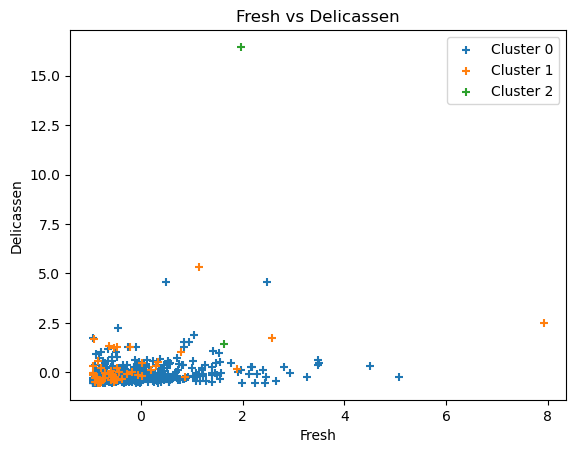

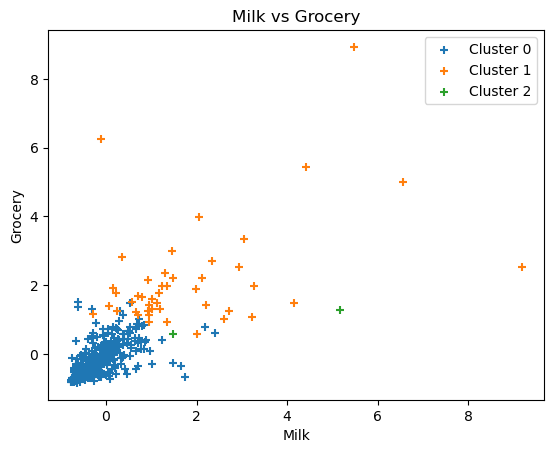

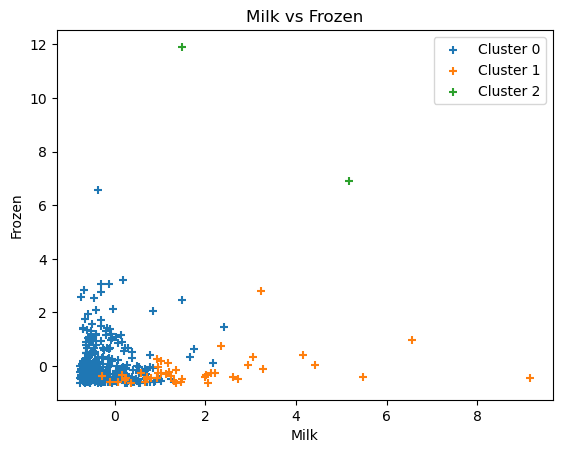

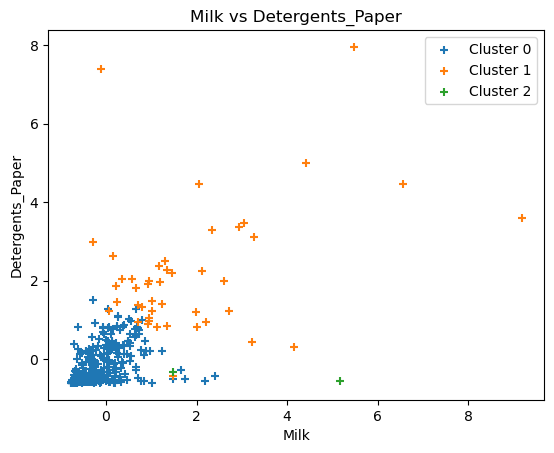

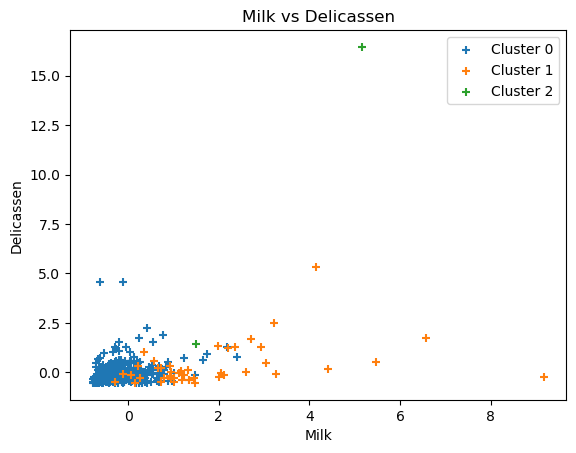

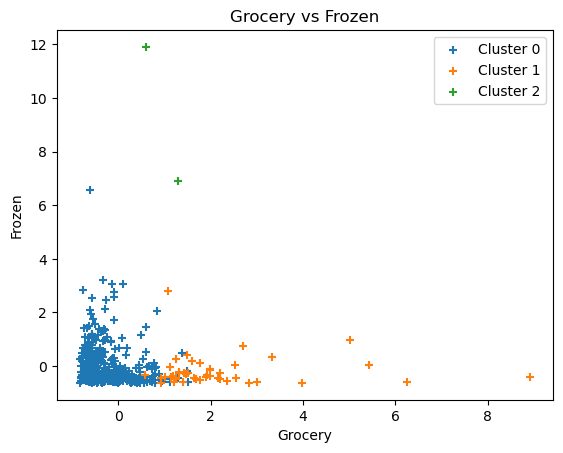

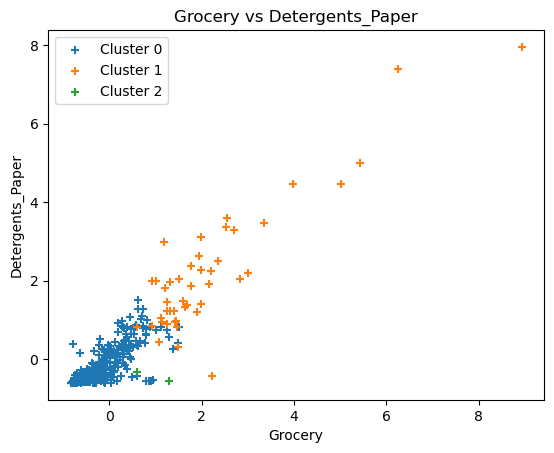

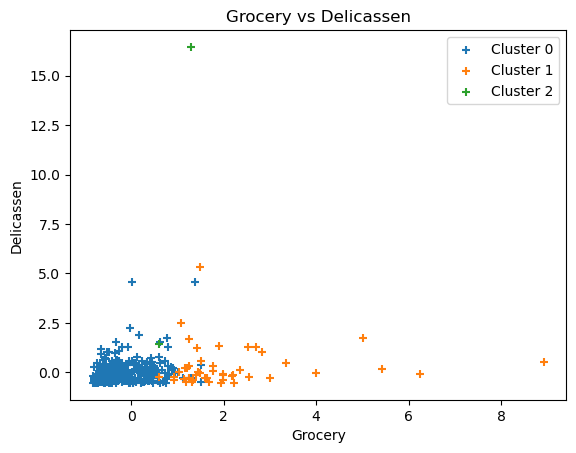

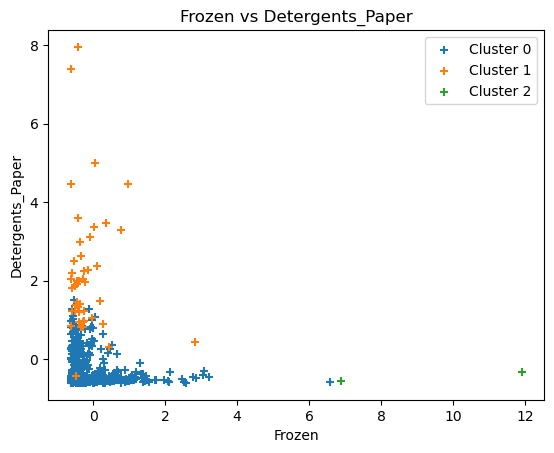

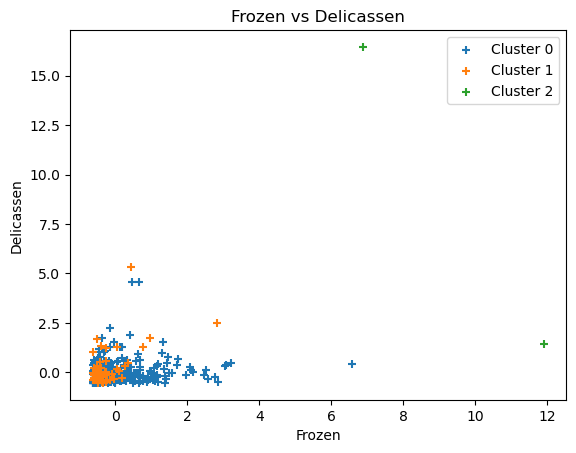

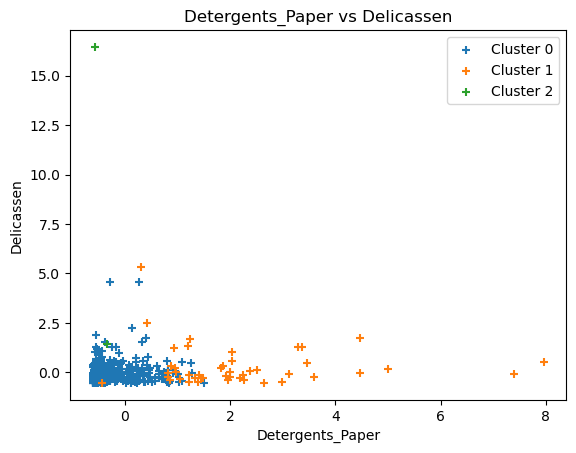

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

k_clusters = 3
kmeans = cluster.KMeans(n_clusters=k_clusters)

df = wholesale_customers.standardize(df)
kmeans.fit(df)

for i, attr_1 in enumerate(df.columns):
    for j in range(i + 1, len(df.columns)):
        attr_2 = df.columns[j]
        data = df.loc[:, (df.columns == attr_1) | (df.columns == attr_2)]
        cluster_nums = np.array(range(k_clusters))
        cluster_names = np.char.add("Cluster ", cluster_nums.astype(str))
        for cluster_index in cluster_nums:
            data_mask = kmeans.labels_ == cluster_index
            data_filtered = data[data_mask]
            plt.scatter(data_filtered[attr_1], data_filtered[attr_2], marker="+")
        plt.xlabel(attr_1)
        plt.ylabel(attr_2)
        plt.title(f"{attr_1} vs {attr_2}")
        plt.legend(cluster_names)
        plt.savefig(f"{attr_1}--{attr_2}.pdf", dpi=500)
        plt.show()

In [13]:
x_filtered[:,0]

NameError: name 'x_filtered' is not defined